## **Project Name** - Bike Sharing Demand Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**              - Rohit Bodkhe

# **Github Link -**
https://github.com/itsrohitzz/Bike_sharing_demand_prediction

# **PPT Link -**
https://docs.google.com/presentation/d/1FTd-KvP1wdJLeAQ6hBvBA-5iXGzP6-om/edit?usp=share_link&ouid=103912810157182562721&rtpof=true&sd=true

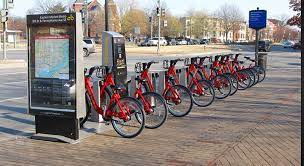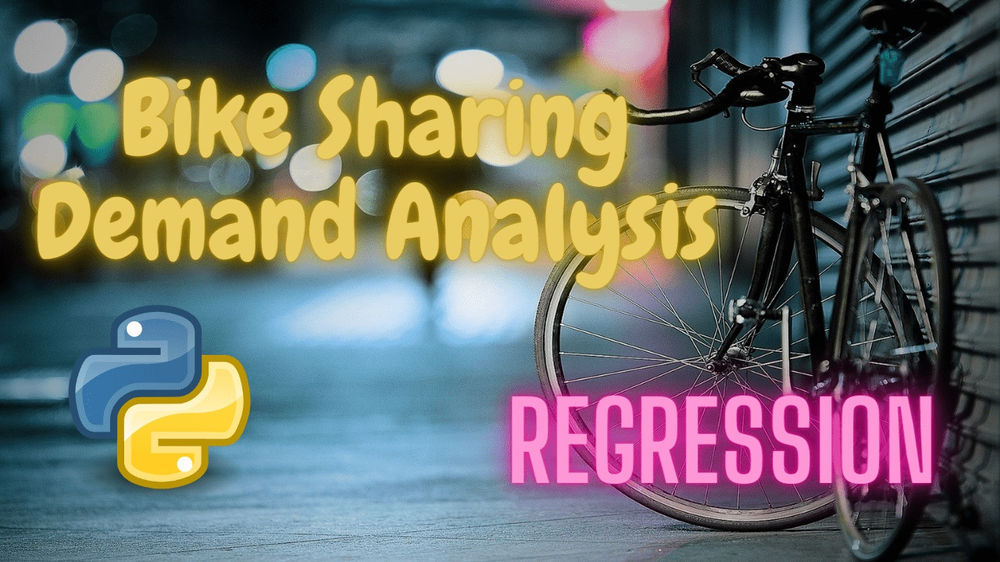

# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

#**Attribute Information**
1. Date : year-month-day
2. Rented Bike count - Count of bikes rented at each hour
3. Hour - Hour of the day
4. Temperature-Temperature in Celsius
5. Humidity - %
6. Windspeed - m/s
7. Visibility - 10m
8. Dew point temperature - Celsius
9. Solar radiation - MJ/m2
10. Rainfall - mm
11. Snowfall - cm
12. Seasons - Winter, Spring, Summer, Autumn
13. Holiday - Holiday/No holiday
14. Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
%matplotlib inline
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
# head of data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# tail of data
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# description of data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# columns in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#**Let's Performing EDA**

In [ ]:
# checking for null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# converting string format of 'Date' column into date-time format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# all the seasons present in data
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
# creating a column containing the year from a particular date
year = []
for i in range(len(df['Date'])):
  year.append(df['Date'][i].year)
df['year'] = year  

# creating a column containing the month number from a particular date
months = []
for i in range(len(df['Date'])):
  months.append(df['Date'][i].month)
df['month'] = months  

# creating a dataframe containing the sum of all column values pertaining to differant seasons
df_s = df.groupby('Seasons').sum()
df_s

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
Seasons,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,18816
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,10992
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15048
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,12312


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6704b3a400>],
      dtype=object)

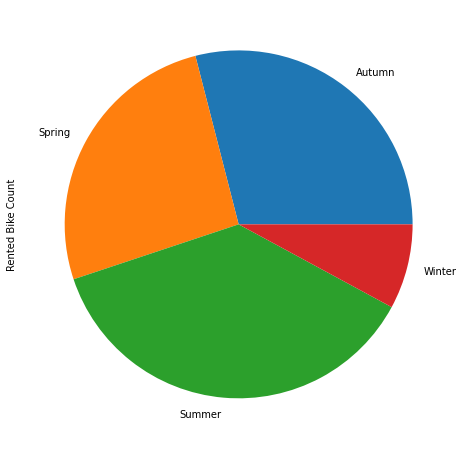

In [ ]:
# creating a pie chart of bike count in differant seasons
df_s['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8))

Most bikes have been rented in the summer season.

Least bike rent count is in winter season.

Autumn and spring seasons have almost equal amounts of bike rent count.

In [ ]:
# creating a dataframe which contains rented bike counts in each seasaon
df_seasons = df.groupby('Seasons').sum()['Rented Bike Count']

In [ ]:
df_seasons.head()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

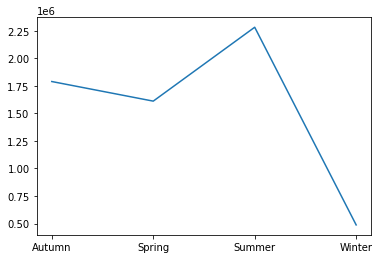

In [ ]:
# Line plot showing the differance in rent rate in differant seasons 
plt.plot(df_seasons)
plt.show()

In [ ]:
# creating a series which shows total number of bikes rented in each year
df_year = df.groupby('year').sum()['Rented Bike Count']
df_year

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

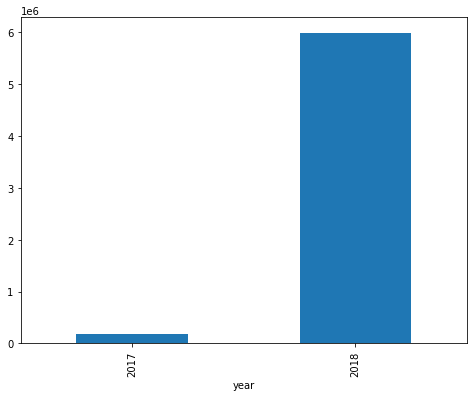

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
df_year.plot(kind='bar', ax=ax)

Above plot shows that most of the bikes have been rented in the year 2018.

In [ ]:
# creating a series which shows total number of bikes rented on the type of day
df_hol = df.groupby('Holiday').sum()['Rented Bike Count']
df_hol

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

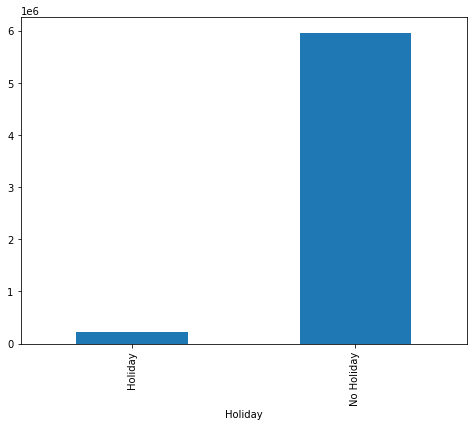

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
df_hol.plot(kind='bar', ax=ax)

Above plot shows that most of the bikes have been rented on working days.

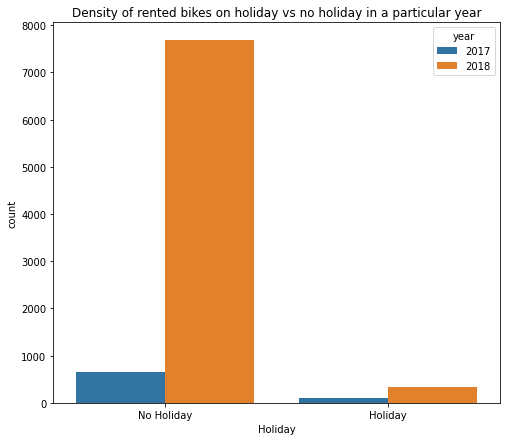

In [ ]:
# bikes rented on type of day in each year
plt.figure(figsize=(8,7))
sns.countplot(x='Holiday', hue = 'year', data= df)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


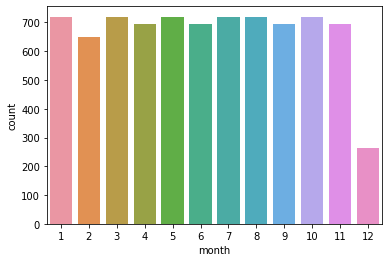

In [ ]:
# plot showing the bikes rented in differant months in the year 2018
sns.countplot(df.loc[df['year']==2018,'month'])

Above plot shows that very less bikes have been rented in december which is winter season.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


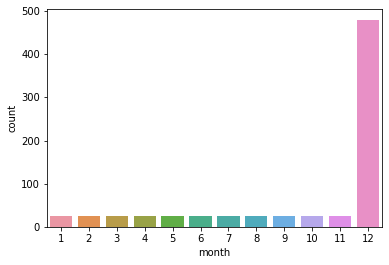

In [ ]:
# plot showing the bikes rented in differant months in the year 2017
sns.countplot(df.loc[df['year']==2017,'month'])

Above plot shows that most bikes have been rented in december in the year 2017 as we dont have data before that.

In [ ]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall
df_rain = pd.DataFrame(df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())

# resetting index of the dataframe
df_rain.reset_index(inplace=True)

df_rain.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


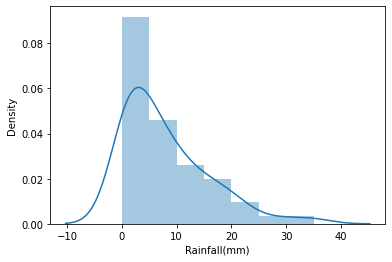

In [ ]:
# plot showing distribution of bike rentals according to rainfall intensity
sns.distplot(df_rain['Rainfall(mm)'])

Above plot shows that people tend to rent bikes when there is no or less rainfall.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


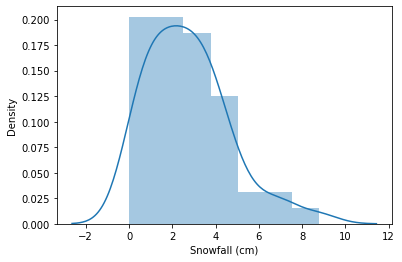

In [ ]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall
df_snow = pd.DataFrame(df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())
df_snow.reset_index(inplace=True)
df_snow.head()

# plot showing distribution of bike rentals according to snowfall intensity
sns.distplot(df_snow['Snowfall (cm)'])

Above plot shows that people rent more bikes when there is no or less snowfall.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


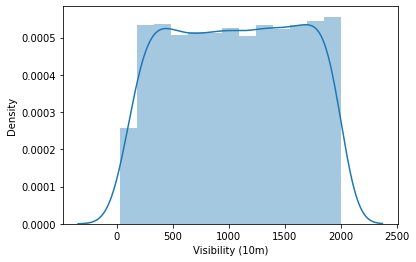

In [ ]:
# creating a graph containing the count of bikes rented in differant visibility ranges
df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)
sns.distplot(df_visi['Visibility (10m)'])

Above plot shows that people  rent more bikes when the visibility is between 300 to 1700.

###**Let's now Process the Data**

In [ ]:
# encoding the season names

df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)
df.drop(columns=['Seasons'],axis=1,inplace=True)

# encoding 'Holiday' column with 0 and 1
for i in range(len(df['Holiday'])):
  if df['Holiday'][i] == 'No Holiday':
    df['Holiday'][i] = 0
  else:
    df['Holiday'][i] = 1  

# encoding 'Functioning Day' column with 0 and 1
for i in range(len(df['Functioning Day'])):
  if df['Functioning Day'][i] == 'Yes':
    df['Functioning Day'][i] = 1
  else:
    df['Functioning Day'][i] = 0 

<ipython-input-31-d70854febc71>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][i] = 0
<ipython-input-31-d70854febc71>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][i] = 1
<ipython-input-31-d70854febc71>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Functioning Day'][i] = 1
<ipython-input-31-d70854febc71>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,Winter,Spring,Summer,Autumn
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0


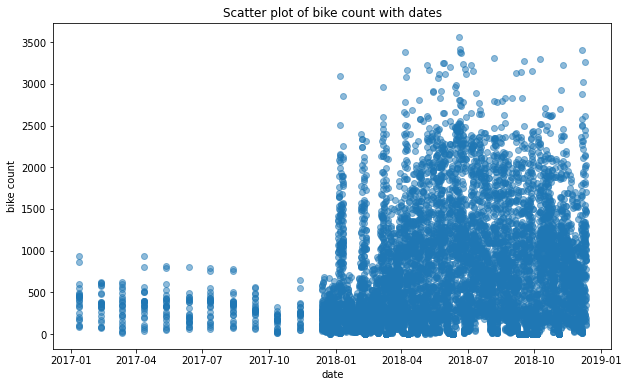

In [ ]:
# scatter plot of bike count on differant dates
plt.figure(figsize=(10,6))
plt.scatter(df['Date'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with dates')
plt.xlabel('date')
plt.ylabel('bike count')
plt.show()

This is evident from the above plot that rentals increased in year 2018

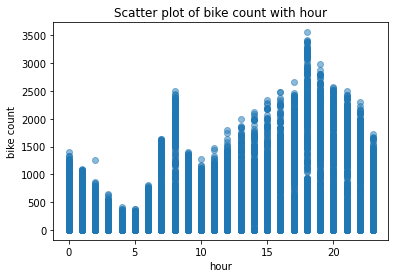

In [ ]:
# scatter plot of bike count at hour of a particular day
plt.scatter(df['Hour'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()

From above its clear that the rentals were more in the morning and evening.This is because people who do not have personal vehicle, coming or going to offices and schools tends to rent bikes.

In [ ]:
# finding the inter-quartile range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
month                           6.00
Winter                          0.00
Spring                          1.00
Summer                          1.00
Autumn                          0.00
dtype: float64


In [ ]:
# listing features to remove outliers
features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Winter','Spring','Summer','Autumn','Holiday','Functioning Day','month','year']
new_features = [x for x in features if x not in list_0]
new_features 

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
# removing outliers
df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Holiday                    8760 non-null   object        
 12  Functi

<ipython-input-37-90e5e19ce098>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


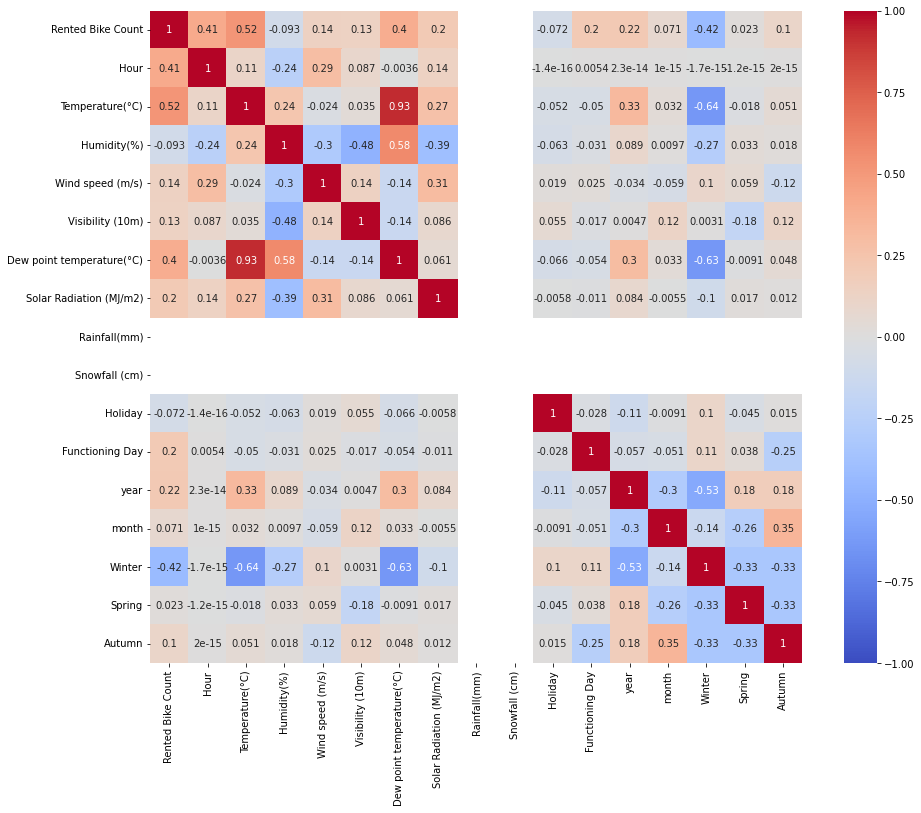

In [ ]:
# filling null values with mean values
df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())
df['Dew point temperature(°C)'] = df['Dew point temperature(°C)'].fillna(df['Dew point temperature(°C)'].mean())
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

# extracting correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

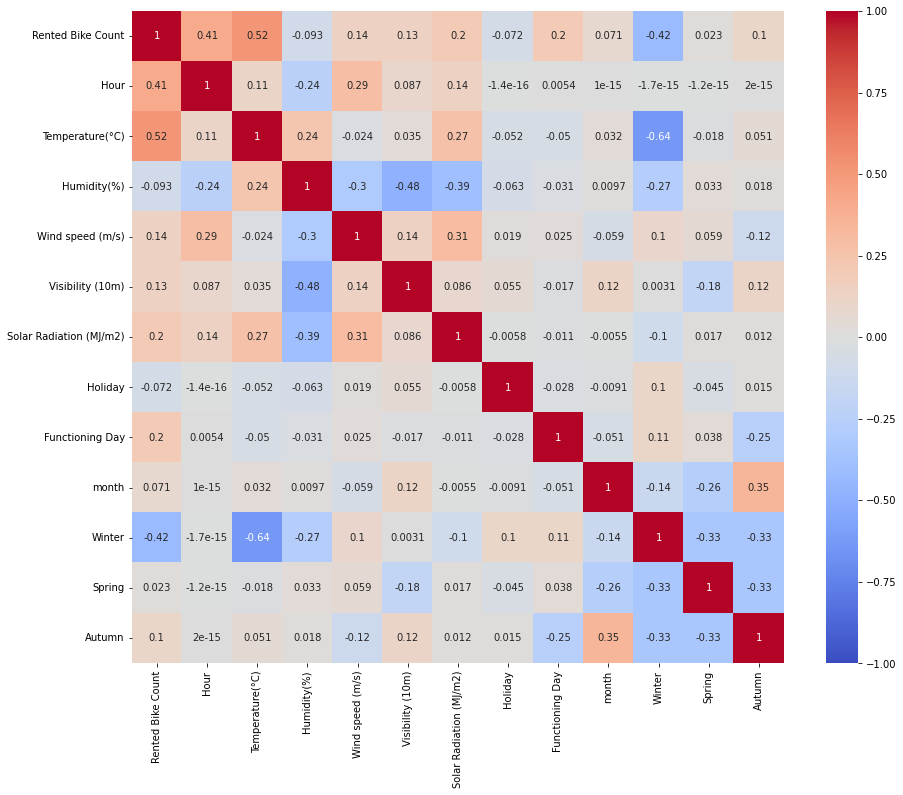

In [ ]:
# dropping columns with more (or less) correlation

df.drop(columns=['Dew point temperature(°C)','Date','Rainfall(mm)','Snowfall (cm)','year'],axis=1,inplace=True)
# extracting correlation heatmap

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [ ]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# multicollinearity result

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.310083
1,Temperature(°C),7.026947
2,Humidity(%),14.738251
3,Wind speed (m/s),5.839148
4,Visibility (10m),9.140411
5,Solar Radiation (MJ/m2),2.263307
6,Holiday,1.073431
7,Functioning Day,22.744697
8,month,5.356313
9,Winter,4.169860


In [ ]:
# dropping "functioning day" column as it adds to multicollinearity
df.drop(columns=['Functioning Day'],axis=1,inplace=True)

In [ ]:
# dropping "holiday" column as it adds to multicollinearity
df.drop(columns=['Holiday'],axis=1,inplace=True)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.232652
1,Temperature(°C),6.982894
2,Humidity(%),10.146646
3,Wind speed (m/s),5.800116
4,Visibility (10m),7.565901
5,Solar Radiation (MJ/m2),2.203240
6,month,5.226156
7,Winter,3.829748
8,Spring,2.343245
9,Autumn,2.386321


In [ ]:
# checking types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   month                    8760 non-null   int64  
 8   Winter                   8760 non-null   int64  
 9   Spring                   8760 non-null   int64  
 10  Autumn                   8760 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 752.9 KB


#Let's start creating our Models

In [ ]:
# Creating the data of independent variables
Y = df['Rented Bike Count']

# Create the dependent variable data
X = df.drop(columns=['Rented Bike Count'],axis=1).values

In [ ]:
X

array([[Timestamp('2017-01-12 00:00:00'), 0, -5.2, ..., 1, 0, 0],
       [Timestamp('2017-01-12 00:00:00'), 1, -5.5, ..., 1, 0, 0],
       [Timestamp('2017-01-12 00:00:00'), 2, -6.0, ..., 1, 0, 0],
       ...,
       [Timestamp('2018-11-30 00:00:00'), 21, 2.6, ..., 0, 0, 1],
       [Timestamp('2018-11-30 00:00:00'), 22, 2.1, ..., 0, 0, 1],
       [Timestamp('2018-11-30 00:00:00'), 23, 1.9, ..., 0, 0, 1]],
      dtype=object)

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Linear regression model**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predicting the Train set results
Y_pred_train = regressor.predict(X_train)

# Predicting the Test set results
Y_pred_test = regressor.predict(X_test)

# r2 score of train set
r2_linear_train = r2_score(Y_train, Y_pred_train)
r2_linear_train

0.44902540397449364

In [ ]:
r2_linear_test = r2_score(Y_test, Y_pred_test)

# different metrics used
MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 234427.9324728069
RMSE : 484.1775836124664
R2 : 0.4398679093079023
Adjusted R2 :  0.436650608384915


##**Lasso Regression Model**

In [ ]:
#Cross validation

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [ ]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.8}

Using  {'alpha': 0.8}  the negative mean squared error is:  -229716.0365491816


In [ ]:
Y_pred_lasso = lasso_regressor.predict(X_test)

# different metrics used
MSE  = mean_squared_error(Y_test,Y_pred_lasso)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2_lasso_test = r2_score(Y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 234667.18894861892
RMSE : 484.4245957304593
R2 : 0.43929624010195667
Adjusted R2 :  0.4360756556108708


##**Ridge Regression Model**

In [ ]:
# training model
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [ ]:
# getting best parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -229468.04919725153


In [ ]:
Y_pred_ridge = ridge_regressor.predict(X_test)

# evaluating metrics
MSE  = mean_squared_error(Y_test,Y_pred_ridge)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
r2_ridge_test = r2_score(Y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 234506.37981479266
RMSE : 484.2585877553362
R2 : 0.4396804705790264
Adjusted R2 :  0.4360756556108708


In [ ]:
# creating a list of all model names
model_list = ['Linear regression','Lasso regression','Ridge regression']

In [ ]:
# creating a list of all model r2 score results from above
result_list = [r2_linear_test,r2_lasso_test,r2_ridge_test]

In [ ]:
# creating an empty dataframe
results_df = pd.DataFrame()

# adding above lists to the empty dataframe
results_df['model name'] = model_list
results_df['R2-score'] = result_list

# dataframe containing results from all the above models used
results_df

,model name,R2-score
0,Linear regression,0.439868
1,Lasso regression,0.439296
2,Ridge regression,0.439680


#**Conclusion**

1. Coming from the beginning, we did EDA on the dataset and also cleaned the data according to our needs.

2. After that we were able to draw relevant conclusions from the given data and then we trained our model on linear regression and other models.

3. Out of all models used , with Linear Regression model we were able to get the r2-score of 0.4398.

4. The model which performed poorly was Lasso Regression with r2-score of 0.4392. 
5. Given the size of data and the amount of irrelevance in the data , the above score is good or normal we can say.